
#### Teoría de Circuitos II

#  TPL1
#### Autor: Grupo 2 ?

Federico Rodriguez Vizzon

Facundo ...

Tamara ....

<img src="./ned.jpg" align="left" width="150" /> 

(60.0, 5999.99999999998)

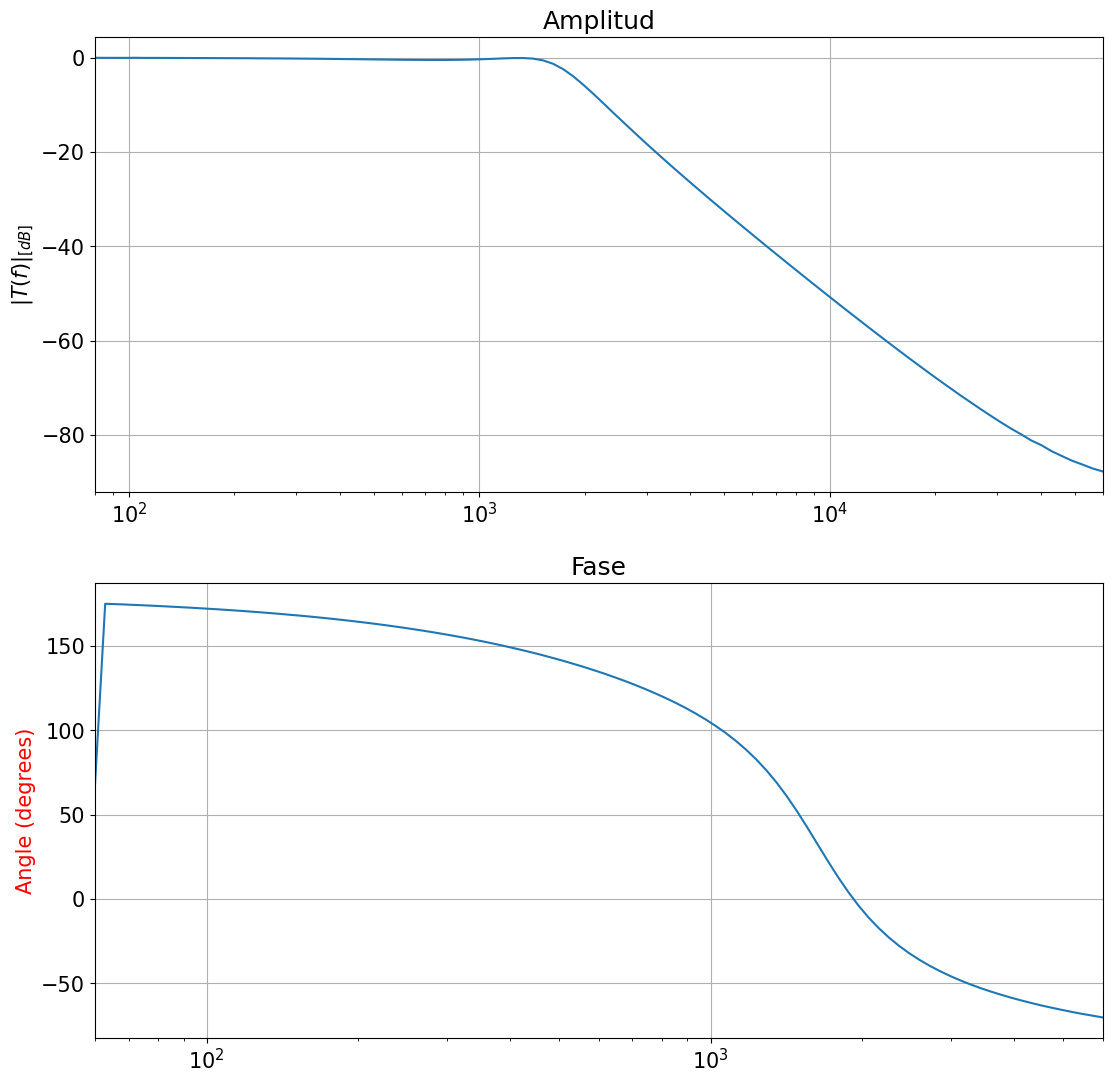

In [3]:
from numpy import genfromtxt
import matplotlib.pyplot as plot
import matplotlib

#levantamos los valores de modulo (previeamente descartamos el header y otro relleno del csv.)
module_csv = genfromtxt('modulo_demo.csv', delimiter = ',')
y_0_axis_amplitude = module_csv[:, 1] 
x_0_axis_frequency = module_csv[:, 0]

##Valores maximos y minimos que tenemos que representar en el eje x
x_0_upper_limit = max(x_0_axis_frequency)
x_0_lower_limit = min(x_0_axis_frequency)

##Valores maximos y minimos que tenemos que representar en el eje y
y_0_upper_limit = max(y_0_axis_amplitude)*1.1
y_0_lower_limit = min(y_0_axis_amplitude)*0.9

#levantamos la curvar de fase:
fase_csv = genfromtxt('fase.csv', delimiter = ',')
y_1_axis_phase = fase_csv[:, 1] 
x_1_axis_frequency = fase_csv[:, 0]

##Valores maximos y minimos que tenemos que representar en el eje x
x_1_upper_limit = max(x_1_axis_frequency)
x_1_lower_limit = min(x_1_axis_frequency)

##Valores maximos y minimos que tenemos que representar en el eje x
y_1_upper_limit = max(y_1_axis_phase)*1.1
y_1_lower_limit = min(y_1_axis_phase)*0.9

##Configuramos el graph
matplotlib.rcParams['figure.figsize'] = (13,13)
matplotlib.rcParams['font.size'] = 15
#configuramos la cantidad de graficos, 2 filas 1 columna
figure, axes = plot.subplots(2,1)

axes[0].plot(x_0_axis_frequency, y_0_axis_amplitude)
axes[0].set_ylabel(r'$|T(f)|_{[dB]}$')
axes[0].set_xscale('log')
axes[0].grid()
axes[0].set_title("Amplitud")
#limitamos el grafico a los valores de frecuencia disponibles.
axes[0].set_xlim([x_0_lower_limit, x_0_upper_limit])
#no limitamos en y, la libreria lo esta resolviendo mejor que nosotros.
#axes[0].set_ylim([y_0_lower_limit, y_0_upper_limit])

axes[1].plot(x_1_axis_frequency, y_1_axis_phase)
axes[1].set_ylabel("Angle (degrees)", color='red')
axes[1].set_xscale('log')
axes[1].grid()
axes[1].set_title("Fase")
axes[1].set_xlim([x_1_lower_limit, x_1_upper_limit])


